In [ ]:
from pycaret.classification import *
from pycaret.utils import enable_colab
enable_colab()

import numpy as np
import pandas as pd
import tensorflow as tf
import os 
import random

def seed_all(s):
    random.seed(s)
    np.random.seed(s)
    tf.random.set_seed(s)
    os.environ['PYTHONHASHSEED'] = str(s)
    
global_seed = 0
seed_all(global_seed)

In [ ]:
dataset_file = '/content/drive/MyDrive/Americanas/dataset_cdjr.parquet.gzip'

In [38]:
df = pd.read_parquet(dataset_file)
df.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
337,200.0,2,662.28,39.10,-188.55,0.246978,761,0.004548,3.523703,167326,33441.06,0.019804,26.850,0.009198,94.611429,7,0
266,150.0,2,0.00,149.55,-0.45,0.150000,3,0.037975,0.000000,79,78.93,0.000000,0.000,0.000000,0.000000,0,1
236,50.0,1,346.08,30.41,-102.10,2.430952,42,0.004239,3.389618,9907,18858.77,0.018351,25.525,0.095238,86.520000,4,0
274,100.0,2,0.00,43.84,-56.16,0.150968,372,0.005854,0.000000,63544,1164.11,0.000000,0.000,0.000000,0.000000,0,1
208,50.0,1,87.56,-3.05,-94.50,0.412664,229,0.004572,0.926561,50089,1786.26,0.049019,94.500,0.004367,87.560000,1,0


# Modelagem
Para realização da modelagem utilizei a ferramenta Pycaret visto que optei por não executar algoritmos neurais e a ferramenta Pycaret disponibiliza disversos algoritmos não neurais, implementando tarefas como pré processamento dos dados e otimização de parâmetros dos algoritmos.  
A decisão de não executar modelos neurais passam por 2 aspectos:
- Tempo insuficiente para tunning do modelo: modelos neurais possuem nessecidade de tunning e alto custo de parametrização;
- Pequeno conjunto de dados: alto risco de overffiting com modelos neurais.

Como trabalhado na etapa de preparação dos dados, experimentei cinco conjuntos de features:
- Todas as features;
- Conjunto de features selecionadas a partir da feature importance do algoritmo Random Forest;
- Conjunto de features selecionadas a partir da feature importance do algoritmo SVM;
- Conjunto de features selecionadas a partir da feature importance do algoritmo SGD;
- Conjunto de features selecionadas a partir da feature importance do algoritmo Ridge.

In [ ]:
rf_feature_sel = df[['feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature9', 'feature10', 'target']] # RF feature selection
svm_feature_sel = df[['feature0', 'feature2', 'feature5', 'feature7', 'feature10', 'feature13', 'feature15', 'target']] #SVM feature selection
sgd_feature_sel = df[['feature4', 'feature7', 'feature8', 'feature10', 'feature12', 'feature15', 'target']] #SGD feature selection
ridge_feature_sel = df[['feature2', 'feature4', 'feature6', 'feature7', 'feature14', 'feature15', 'target']] #Ridge feature selection

In [ ]:
experimento = setup(data=df,
                   target='target',
                   train_size=.8,
                   fold = 5,
                   normalize=True,
                   transformation=True,
                   transformation_method='quantile',
                   log_experiment=False,
                   experiment_name='Desafio_Tecnico',
                   session_id=1,
                   silent=True)

Assim como na etapa de preparação dos dados, na experimentação avaliei 5 algoritmos escolhidos para contemplar diferentes abordagens. Os algoritmos experimentados foram:
- Random Forest (RF);
- Gradient Boosting Classifier (GBC);
- Support Vector Machine (SVM);
- Ridge;
- Logistic Regression (LR).

Cada algoritmo foi avaliado com todos os conjuntos de features da seleção de features.

Abaixo temos a execução do melhor modelo obtido através de avaliação 5-fold cross validation. O resultado dos outros modelos pode ser encontrado [aqui](https://docs.google.com/spreadsheets/d/1Z2nioEfYBve8F2uLDxee3aMmD04uB289PIVw8K1nZhI/edit?usp=sharing).

In [77]:
model = create_model('gbc', fold = 5)
model = tune_model(model, fold=5, n_iter=200)
model = finalize_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7333,0.7136,0.8095,0.7391,0.7727,0.4518,0.4545
1,0.6400,0.6732,0.6905,0.6744,0.6824,0.2671,0.2672
2,0.7162,0.7768,0.7561,0.7381,0.7470,0.4240,0.4242
3,0.7432,0.7805,0.8293,0.7391,0.7816,0.4726,0.4772
4,0.7027,0.7450,0.7561,0.7209,0.7381,0.3948,0.3954
Mean,0.7071,0.7378,0.7683,0.7223,0.7444,0.4021,0.4037
Std,0.0363,0.0404,0.0485,0.0249,0.0349,0.0724,0.0736


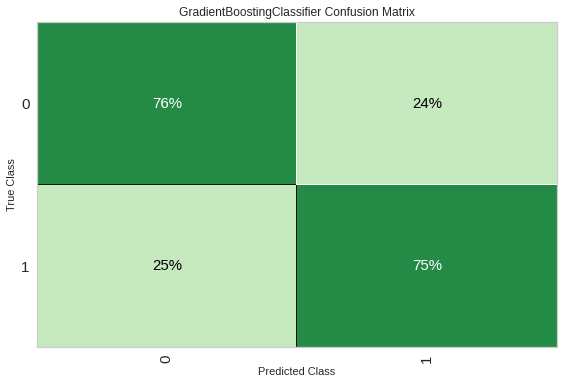

In [78]:
plot_model(model, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

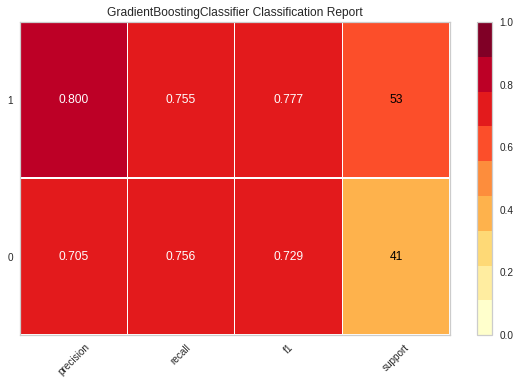

In [79]:
plot_model(model, 'class_report')

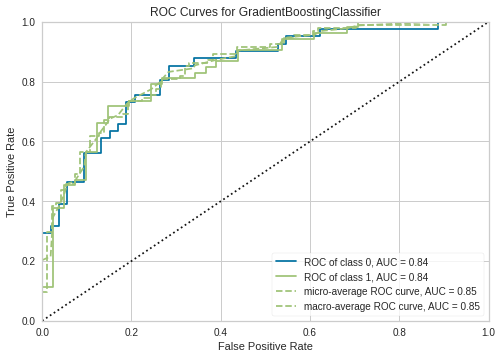

In [80]:
plot_model(model, 'auc')

# Execução do Modelo
Para executar o modelo é necessário utilizar a biblioteca Pycaret. Por meio dela carregamos o modelo e executamos a predição diretamente sobre os dados originais da instância de entrada. Outra possibilide é executar a predição sobre um dataframe. A seguir temos um exemplo.

In [45]:
sample = {
    "feature0": 200.0,
    "feature1": 2,
    "feature2": 662.28,
    "feature3": 39.0,
    "feature4": -188.55,
    "feature5": 0.246978,
    "feature6": 761,
    "feature7": 0.004548,
    "feature8": 3.523703,
    "feature9": 167326,
    "feature10": 33441.06,
    "feature11": 0.019804,
    "feature12": 26.850,
    "feature13": 0.009198,
    "feature14": 94.611429,
    "feature15": 7
  }

model = load_model('/content/drive/MyDrive/Americanas/modelo')

predict = predict_model(
                    model,
                    data=pd.DataFrame([sample])
            )['Label'][0]

print(f'Valor predito: {predict}')

Transformation Pipeline and Model Successfully Loaded
Valor predito: 1
